In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
netflix_data = pd.read_csv('/content/drive/MyDrive/netflix.csv')

In [ ]:
#No: of data points and features
netflix_data.shape

(8807, 12)

The dataset consists of 8807 entries and 12 attributes

In [ ]:
#Column names in the dataset
netflix_data.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [ ]:
#Column data types.

netflix_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


The data has one column, release year with numerical data and the rest with categorical data all with non null values

In [ ]:
#Basic statistical computations of the data like extreme values, count of data points standard deviation, etc.
#Any missing value or NaN value is automatically skipped.
netflix_data.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [ ]:
#Preview of the dataset
netflix_data

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [ ]:
netflix_data.drop('description', axis = 1, inplace = True)

In [3]:
#How many data points are present for each class
movies_count_top10 = netflix_data['director'].value_counts().head(10)
movies_count_top10 = movies_count_top10.reset_index()
movies_count_top10

,director,count
0,Rajiv Chilaka,19
1,"Raúl Campos, Jan Suter",18
2,Marcus Raboy,16
3,Suhas Kadav,16
4,Jay Karas,14
5,Cathy Garcia-Molina,13
6,Martin Scorsese,12
7,Youssef Chahine,12
8,Jay Chapman,12
9,Steven Spielberg,11


<ipython-input-4-75ce769e9d80>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = movies_count_top10, x = movies_count_top10['director'], y = movies_count_top10['count'],width = 0.65, palette = palette_colors)


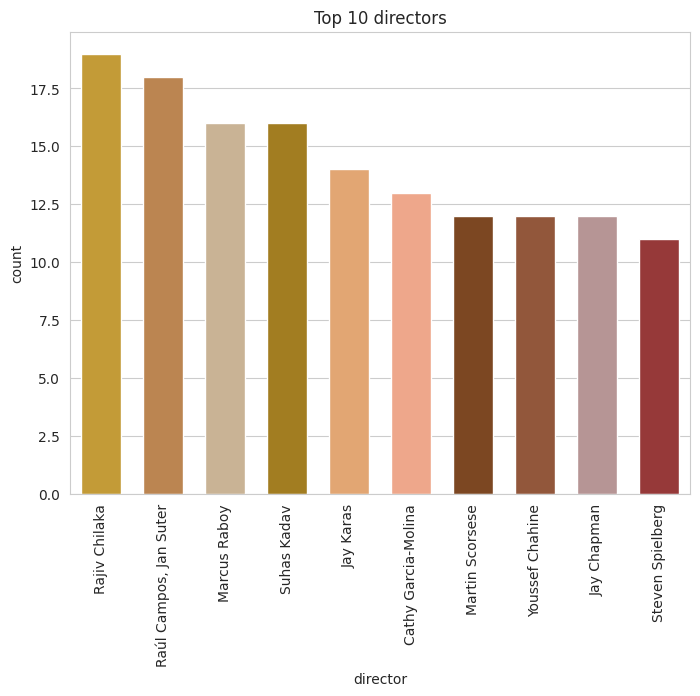

In [4]:
sns.set_style("whitegrid")
plt.figure(figsize=(8,6))
palette_colors = {'#FFA07A','#A52A2A','#A0522D',	'#8B4513','#CD853F','#B8860B','#DAA520','#F4A460','#BC8F8F','#D2B48C'	}
sns.barplot(data = movies_count_top10, x = movies_count_top10['director'], y = movies_count_top10['count'],width = 0.65, palette = palette_colors)
plt.xticks(rotation = 90)
plt.title('Top 10 directors')
plt.show()

The content streamed on the netflix platform is majorly from the above directors.

**Unnesting director column**




In [5]:
director_df = (netflix_data[['show_id', 'type','title', 'director']]
              .dropna()
              .assign(director = lambda x: x['director'].str.split(','))
              .explode('director')
              .assign(director = lambda x:x['director'].str.strip())

              )

In [ ]:
director_df

,show_id,type,title,director
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson
2,s3,TV Show,Ganglands,Julien Leclercq
5,s6,TV Show,Midnight Mass,Mike Flanagan
6,s7,Movie,My Little Pony: A New Generation,Robert Cullen
6,s7,Movie,My Little Pony: A New Generation,José Luis Ucha
...,...,...,...,...
8801,s8802,Movie,Zinzana,Majid Al Ansari
8802,s8803,Movie,Zodiac,David Fincher
8804,s8805,Movie,Zombieland,Ruben Fleischer
8805,s8806,Movie,Zoom,Peter Hewitt


**Unnesting country column**

In [6]:
country_df = (netflix_data[['show_id', 'type', 'country']]
              .dropna()
              .assign(country = lambda x: x['country'].str.split(','))
              .explode('country')
              .assign(country = lambda x:x['country'].str.strip())
              )

In [ ]:
country_df

,show_id,type,country
0,s1,Movie,United States
1,s2,TV Show,South Africa
4,s5,TV Show,India
7,s8,Movie,United States
7,s8,Movie,Ghana
...,...,...,...
8801,s8802,Movie,Jordan
8802,s8803,Movie,United States
8804,s8805,Movie,United States
8805,s8806,Movie,United States


**Unnesting cast column**

In [7]:
cast_df = (netflix_data[['show_id', 'type', 'title', 'cast']]
              .dropna()
              .assign(cast = lambda x: x['cast'].str.split(','))
              .explode('cast')
              .assign(cast = lambda x:x['cast'].str.strip())
              )

In [ ]:
cast_df

,show_id,type,title,cast,director
2,s3,TV Show,Ganglands,Sami Bouajila,Julien Leclercq
2,s3,TV Show,Ganglands,Tracy Gotoas,Julien Leclercq
2,s3,TV Show,Ganglands,Samuel Jouy,Julien Leclercq
2,s3,TV Show,Ganglands,Nabiha Akkari,Julien Leclercq
2,s3,TV Show,Ganglands,Sofia Lesaffre,Julien Leclercq
...,...,...,...,...,...
8806,s8807,Movie,Zubaan,Manish Chaudhary,Mozez Singh
8806,s8807,Movie,Zubaan,Meghna Malik,Mozez Singh
8806,s8807,Movie,Zubaan,Malkeet Rauni,Mozez Singh
8806,s8807,Movie,Zubaan,Anita Shabdish,Mozez Singh


**Unnesting genre column**

In [8]:
genre_df = (netflix_data[['show_id', 'type', 'listed_in']]
              .dropna()
              .assign(listed_in = lambda x: x['listed_in'].str.split(','))
              .explode('listed_in')
              .assign(listed_in = lambda x:x['listed_in'].str.strip())
              )

In [ ]:
genre_df

,show_id,type,listed_in
0,s1,Movie,Documentaries
1,s2,TV Show,International TV Shows
1,s2,TV Show,TV Dramas
1,s2,TV Show,TV Mysteries
2,s3,TV Show,Crime TV Shows
...,...,...,...
8805,s8806,Movie,Children & Family Movies
8805,s8806,Movie,Comedies
8806,s8807,Movie,Dramas
8806,s8807,Movie,International Movies


**Most Popular Genres**

In [9]:
#Select the genre data and count number of occurences of each genre
genre_counts = genre_df['listed_in'].value_counts().head(10)
genre_counts

listed_in
International Movies        2752
Dramas                      2427
Comedies                    1674
International TV Shows      1351
Documentaries                869
Action & Adventure           859
TV Dramas                    763
Independent Movies           756
Children & Family Movies     641
Romantic Movies              616
Name: count, dtype: int64

In [10]:
#reset index is used to convert the count object to a dataframe
genre_counts_df = genre_counts.reset_index()
genre_counts_df

,listed_in,count
0,International Movies,2752
1,Dramas,2427
2,Comedies,1674
3,International TV Shows,1351
4,Documentaries,869
5,Action & Adventure,859
6,TV Dramas,763
7,Independent Movies,756
8,Children & Family Movies,641
9,Romantic Movies,616


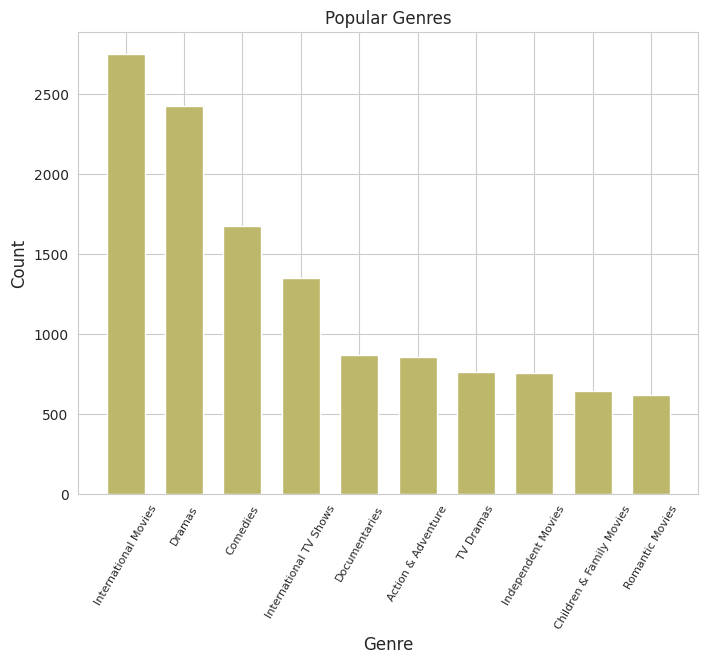

In [11]:
#Set the size of the plot
plt.figure(figsize = (8,6))
#Give the hex code for the bar plot
hex_code = '#BDB76B'
#Create a bar plot with genre on x axis, count on y axis and color set to hex-code
plt.bar(genre_counts.index, genre_counts, width = 0.65, color = hex_code)
#Give the inclination at which the genres are to be dispalyed and set the font size
plt.xticks(rotation=60, fontsize = 8)
#Give labels to x axis and y-axis and bar plot
plt.xlabel('Genre',fontsize=12)
plt.title('Popular Genres')
plt.ylabel('Count',fontsize=12)
#Display the barplot
plt.show()

In the entire netflix data, majority of them are International Movies followed by Dramas, Comedies, International TV Shows,Documentaries,etc

**Total movies/TV shows by country**

In [12]:
top_10_countries = country_df['country'].value_counts().nlargest(10).index.tolist()
top_10_countries

['United States',
 'India',
 'United Kingdom',
 'Canada',
 'France',
 'Japan',
 'Spain',
 'South Korea',
 'Germany',
 'Mexico']

In [13]:
country_df['category'] = country_df['country'].apply(
    lambda x:x if x in top_10_countries else 'other countries'
)

In [14]:
category_count = country_df['category'].value_counts()
category_count.reset_index()
category_count

category
United States      3690
other countries    2463
India              1046
United Kingdom      806
Canada              445
France              393
Japan               318
Spain               232
South Korea         231
Germany             226
Mexico              169
Name: count, dtype: int64

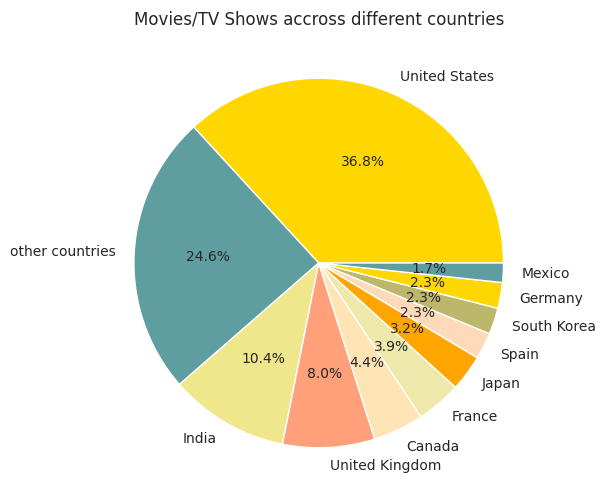

In [15]:
sns.set_style("whitegrid")
plt.figure(figsize=(6,6))
palette_colors = {'#FFD700','#FFE4B5', '#FFDAB9', '#F0E68C', '#EEE8AA', '#F0E68C', '#5F9EA0', '#BDB76B', '#FFA500', '#FFA07A'}
plt.pie(category_count.values, labels=category_count.index, colors = palette_colors, autopct='%1.1f%%')
plt.title('Movies/TV Shows accross different countries')
plt.show()

In [ ]:
rating_fillna = netflix_data.fillna({'rating':'unknown_rating'})
rating_fillna

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries"
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV"
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ..."
...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers"
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies"
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies"
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies"


In [ ]:
rating_fillna.loc[rating_fillna['rating'] == 'unknown_rating']

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in
5989,s5990,Movie,13TH: A Conversation with Oprah Winfrey & Ava ...,NaN,"Oprah Winfrey, Ava DuVernay",NaN,"January 26, 2017",2017,unknown_rating,37 min,Movies
6827,s6828,TV Show,Gargantia on the Verdurous Planet,NaN,"Kaito Ishikawa, Hisako Kanemoto, Ai Kayano, Ka...",Japan,"December 1, 2016",2013,unknown_rating,1 Season,"Anime Series, International TV Shows"
7312,s7313,TV Show,Little Lunch,NaN,"Flynn Curry, Olivia Deeble, Madison Lu, Oisín ...",Australia,"February 1, 2018",2015,unknown_rating,1 Season,"Kids' TV, TV Comedies"
7537,s7538,Movie,My Honor Was Loyalty,Alessandro Pepe,"Leone Frisa, Paolo Vaccarino, Francesco Miglio...",Italy,"March 1, 2017",2015,unknown_rating,115 min,Dramas


In [ ]:
duration_fillna = netflix_data.fillna({'duration':'unknown_duration'})
duration_fillna

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries"
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV"
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ..."
...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers"
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies"
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies"
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies"


In [ ]:
netflix_data.duration.value_counts()

duration
1 Season     1793
2 Seasons     425
3 Seasons     199
90 min        152
94 min        146
             ... 
16 min          1
186 min         1
193 min         1
189 min         1
191 min         1
Name: count, Length: 220, dtype: int64

**1. Find the counts of each categorical variable both using graphical and non-graphical analysis.**


In [16]:
mt_df = netflix_data.type.value_counts().reset_index()
mt_df

,type,count
0,Movie,6131
1,TV Show,2676


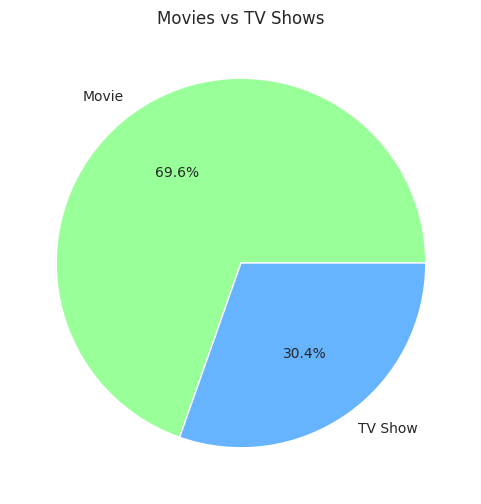

In [17]:
sns.set_style("whitegrid")
plt.figure(figsize=(6,6))
palette_colors = {'#99ff99','#66b3ff'}
plt.pie(mt_df['count'], labels=mt_df['type'], colors = palette_colors, autopct='%1.1f%%')
plt.title('Movies vs TV Shows')
plt.show()

The above plot indicates that 73.7% of the content streamed in netflix are movies which 26.3% are TV Shows

In [18]:
cast_director_df = (netflix_data[['show_id', 'type', 'title', 'cast', 'director']]
              .dropna()
              .assign(cast = lambda x: x['cast'].str.split(','))
              .explode('cast')
              .assign(cast = lambda x:x['cast'].str.strip())
              )

In [ ]:
country_df

,show_id,type,country,category
0,s1,Movie,United States,United States
1,s2,TV Show,South Africa,other countries
4,s5,TV Show,India,India
7,s8,Movie,United States,United States
7,s8,Movie,Ghana,other countries
...,...,...,...,...
8801,s8802,Movie,Jordan,other countries
8802,s8803,Movie,United States,United States
8804,s8805,Movie,United States,United States
8805,s8806,Movie,United States,United States


In [19]:
movie_data = netflix_data[netflix_data['type'] == 'Movie']
movie_data

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...
...,...,...,...,...,...,...,...,...,...,...,...,...
8801,s8802,Movie,Zinzana,Majid Al Ansari,"Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...","United Arab Emirates, Jordan","March 9, 2016",2015,TV-MA,96 min,"Dramas, International Movies, Thrillers",Recovering alcoholic Talal wakes up inside a s...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [20]:
movie_df = movie_data[['type', 'rating', 'duration']]
movie_df

,type,rating,duration
0,Movie,PG-13,90 min
6,Movie,PG,91 min
7,Movie,TV-MA,125 min
9,Movie,PG-13,104 min
12,Movie,TV-MA,127 min
...,...,...,...
8801,Movie,TV-MA,96 min
8802,Movie,R,158 min
8804,Movie,R,88 min
8805,Movie,PG,88 min


In [21]:
movie_df.duration.astype(str).apply(lambda x: x.replace('min', '') if 'min' in x else x).str.strip().reset_index()

,index,duration
0,0,90
1,6,91
2,7,125
3,9,104
4,12,127
...,...,...
6126,8801,96
6127,8802,158
6128,8804,88
6129,8805,88


In [25]:
movie_rating = netflix_data.loc[netflix_data['type'] == 'Movie', 'rating'].mode()[0]
tv_rating = netflix_data.loc[netflix_data['type'] == 'TV Show', 'rating'].mode()[0]

In [27]:
netflix_data['rating'] = netflix_data.apply(lambda x: movie_rating if x['type'] == 'Movie' and pd.isna(x['rating'])
                        else tv_rating if x['type'] == 'TV Show' and pd.isna(x['rating'])
                        else x['rating'], axis=1)

<ipython-input-32-9a38f4ef6bd6>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rating_counts.index, y=rating_counts.values, palette=colors)


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16],
 [Text(0, 0, 'TV-MA'),
  Text(1, 0, 'TV-14'),
  Text(2, 0, 'TV-PG'),
  Text(3, 0, 'R'),
  Text(4, 0, 'PG-13'),
  Text(5, 0, 'TV-Y7'),
  Text(6, 0, 'TV-Y'),
  Text(7, 0, 'PG'),
  Text(8, 0, 'TV-G'),
  Text(9, 0, 'NR'),
  Text(10, 0, 'G'),
  Text(11, 0, 'TV-Y7-FV'),
  Text(12, 0, 'NC-17'),
  Text(13, 0, 'UR'),
  Text(14, 0, '74 min'),
  Text(15, 0, '84 min'),
  Text(16, 0, '66 min')])

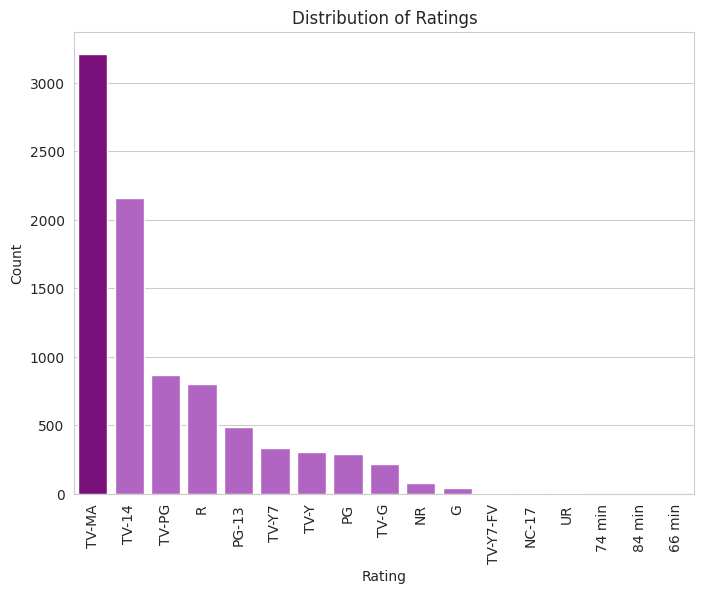

In [32]:
# Count the occurrences of each rating
rating_counts = netflix_data['rating'].value_counts()

# Create a bar chart to visualize the ratings
plt.figure(figsize=(8, 6))
colors = ['#8B008B'] + ['#BA55D3'] * (len(rating_counts) - 1)
sns.barplot(x=rating_counts.index, y=rating_counts.values, palette=colors)

# Customize the plot
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Distribution of Ratings')
plt.xticks(rotation = 90)

# Comparison of tv shows vs. movies.

Find the number of movies produced in each country and pick the top 10
countries.

In [ ]:
country_df

,show_id,type,country
0,s1,Movie,United States
1,s2,TV Show,South Africa
4,s5,TV Show,India
7,s8,Movie,United States
7,s8,Movie,Ghana
...,...,...,...
8801,s8802,Movie,Jordan
8802,s8803,Movie,United States
8804,s8805,Movie,United States
8805,s8806,Movie,United States


In [ ]:
country_df['type'].value_counts()

type
Movie      7379
TV Show    2640
Name: count, dtype: int64

In [33]:
country_movie_df = country_df.loc[country_df['type'] == 'Movie']
movie_count_incountry = country_movie_df.country.value_counts().head(10)
movie_count_incountry

country
United States     2752
India              962
United Kingdom     534
Canada             319
France             303
Germany            182
Spain              171
Japan              119
China              114
Mexico             111
Name: count, dtype: int64

(array([-500.,    0.,  500., 1000., 1500., 2000., 2500., 3000.]),
 [Text(0, -500.0, '−500'),
  Text(0, 0.0, '0'),
  Text(0, 500.0, '500'),
  Text(0, 1000.0, '1000'),
  Text(0, 1500.0, '1500'),
  Text(0, 2000.0, '2000'),
  Text(0, 2500.0, '2500'),
  Text(0, 3000.0, '3000')])

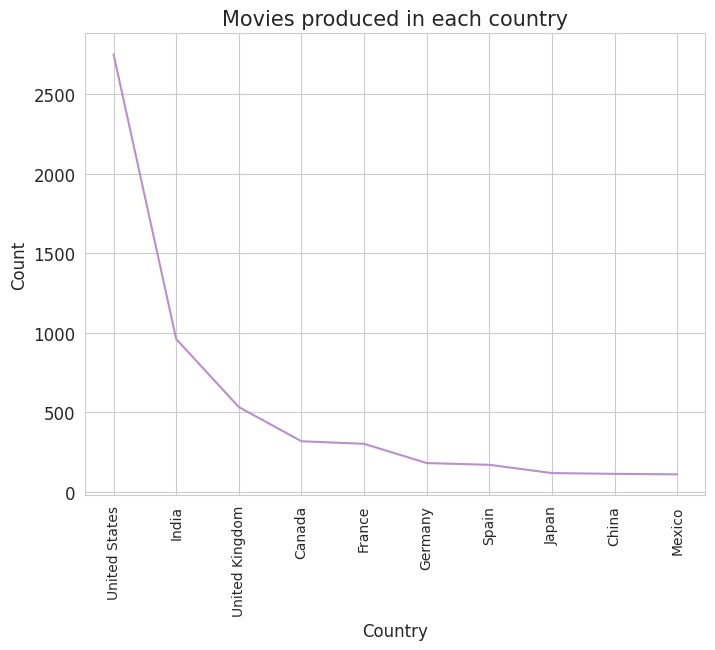

In [ ]:
x_bar = movie_count_incountry.index
y_bar = movie_count_incountry
plt.figure(figsize=(8,6))
plt.plot(x_bar,y_bar,color = '#BB8FCE')
plt.title('Movies produced in each country',fontsize=15)
plt.xlabel('Country',fontsize=12)
plt.ylabel('Count',fontsize=12)
plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=12)

# Find the number of TV Shows produced in each country and pick the top 10
#countries.

In [ ]:
country_show_df = country_df.loc[country_df['type'] == 'TV Show']
show_count_incountry = country_show_df.country.value_counts().head(10)
show_count_incountry

country
United States     938
United Kingdom    272
Japan             199
South Korea       170
Canada            126
France             90
India              84
Taiwan             70
Australia          66
Spain              61
Name: count, dtype: int64

(array([   0.,  200.,  400.,  600.,  800., 1000.]),
 [Text(0, 0.0, '0'),
  Text(0, 200.0, '200'),
  Text(0, 400.0, '400'),
  Text(0, 600.0, '600'),
  Text(0, 800.0, '800'),
  Text(0, 1000.0, '1000')])

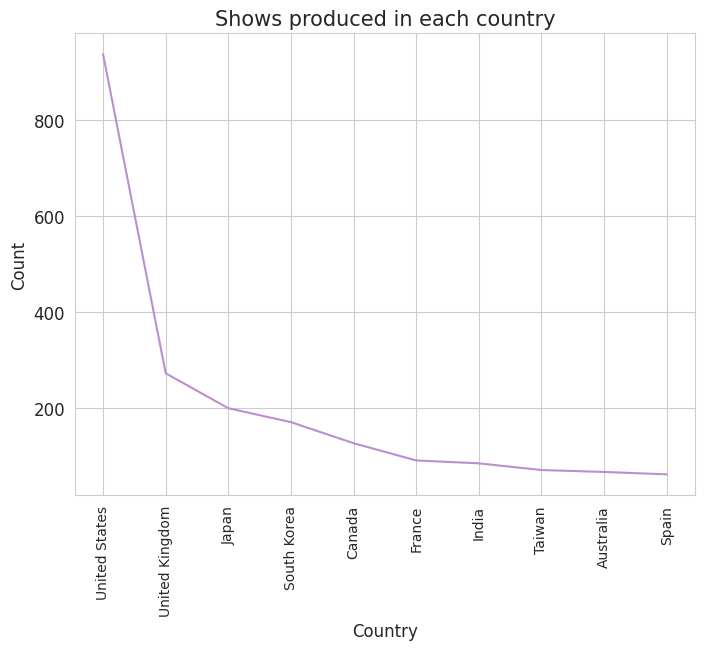

In [ ]:
x_bar = show_count_incountry.index
y_bar = show_count_incountry
plt.figure(figsize=(8,6))
plt.plot(x_bar,y_bar,color = '#BB8FCE')
plt.title('Shows produced in each country',fontsize=15)
plt.xlabel('Country',fontsize=12)
plt.ylabel('Count',fontsize=12)
plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=12)

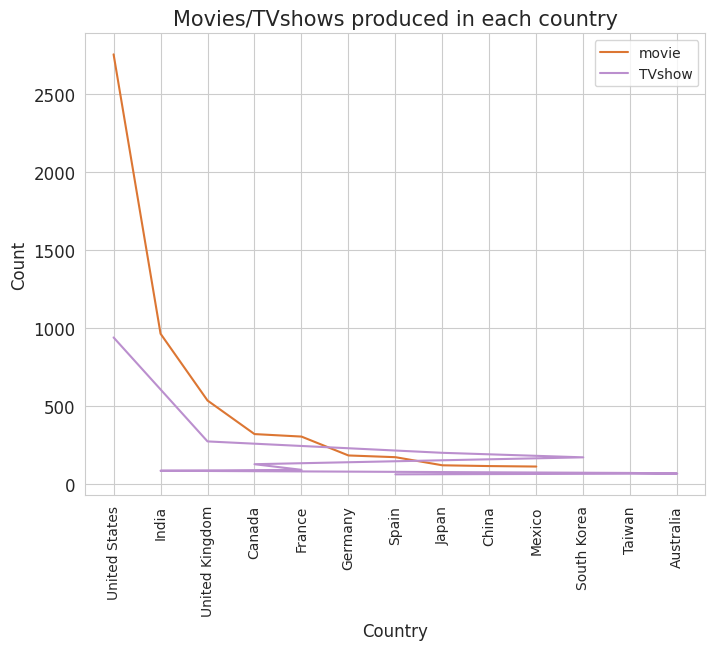

In [ ]:
x1_bar = movie_count_incountry.index
y1_bar = movie_count_incountry
x2_bar = show_count_incountry.index
y2_bar = show_count_incountry
plt.figure(figsize=(8,6))
plt.plot(x1_bar,y1_bar,color = '#DC7633', label = 'movie')
plt.plot(x2_bar,y2_bar,color = '#BB8FCE', label = 'TVshow')
plt.title('Movies/TVshows produced in each country',fontsize=15)
plt.xlabel('Country',fontsize=12)
plt.ylabel('Count',fontsize=12)
plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=12)
plt.legend()

Most number of movies/TV shows are produced in US and India

# What is the best time to launch a TV show?

Find which is the best month to release the Tv-show or the movie. Do the
analysis separately for Tv-shows and Movies

In [ ]:
netflix_data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries"
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV"
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ..."


datetime format

In [56]:
print(netflix_data['date_added'].head())

0    September 25, 2021
1    September 24, 2021
2    September 24, 2021
3    September 24, 2021
4    September 24, 2021
Name: date_added, dtype: object


In [57]:
date_df = pd.DataFrame()

In [58]:
date_df['type'] = netflix_data['type']

In [59]:
date_df['date_added'] = netflix_data['date_added']

In [60]:
date_df['show_id'] = netflix_data['show_id']

In [74]:
date_df['release_year'] = netflix_data['release_year']

In [61]:
date_df['date_added'] = date_df['date_added'].str.strip()

In [62]:
date_df['date_added'] = pd.to_datetime(date_df['date_added'], format="%B %d, %Y")
date_df['date_added']

0      2021-09-25
1      2021-09-24
2      2021-09-24
3      2021-09-24
4      2021-09-24
          ...    
8802   2019-11-20
8803   2019-07-01
8804   2019-11-01
8805   2020-01-11
8806   2019-03-02
Name: date_added, Length: 8807, dtype: datetime64[ns]

In [63]:
date_df['date_added'].fillna(0)

0       2021-09-25 00:00:00
1       2021-09-24 00:00:00
2       2021-09-24 00:00:00
3       2021-09-24 00:00:00
4       2021-09-24 00:00:00
               ...         
8802    2019-11-20 00:00:00
8803    2019-07-01 00:00:00
8804    2019-11-01 00:00:00
8805    2020-01-11 00:00:00
8806    2019-03-02 00:00:00
Name: date_added, Length: 8807, dtype: object

In [64]:
date_df['date_added']

0      2021-09-25
1      2021-09-24
2      2021-09-24
3      2021-09-24
4      2021-09-24
          ...    
8802   2019-11-20
8803   2019-07-01
8804   2019-11-01
8805   2020-01-11
8806   2019-03-02
Name: date_added, Length: 8807, dtype: datetime64[ns]

In [65]:
#date_df[date_df['date_added'].isnull()]

In [66]:
date_df['date_added'].fillna(0, inplace = True)

In [67]:
#date_df[date_df['date_added'].isnull()]

In [68]:
date_df['date_added'] = pd.to_datetime(date_df['date_added'])

In [69]:
date_df['month_added'] = date_df['date_added'].dt.month

In [70]:
date_df['date_added'].value_counts().sum()

8807

In [71]:
date_df['month_name_added'] = date_df['date_added'].dt.month_name()

In [72]:
date_df['year_added'] = date_df['date_added'].dt.year

In [75]:
date_df

,type,date_added,show_id,month_added,month_name_added,year_added,release_year
0,Movie,2021-09-25,s1,9,September,2021,2020
1,TV Show,2021-09-24,s2,9,September,2021,2021
2,TV Show,2021-09-24,s3,9,September,2021,2021
3,TV Show,2021-09-24,s4,9,September,2021,2021
4,TV Show,2021-09-24,s5,9,September,2021,2021
...,...,...,...,...,...,...,...
8802,Movie,2019-11-20,s8803,11,November,2019,2007
8803,TV Show,2019-07-01,s8804,7,July,2019,2018
8804,Movie,2019-11-01,s8805,11,November,2019,2009
8805,Movie,2020-01-11,s8806,1,January,2020,2006


In [ ]:
date_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   type              8807 non-null   object        
 1   date_added        8807 non-null   datetime64[ns]
 2   month_added       8807 non-null   int32         
 3   month_name_added  8807 non-null   object        
 4   year_added        8807 non-null   int32         
dtypes: datetime64[ns](1), int32(2), object(2)
memory usage: 275.3+ KB


In [ ]:
movie_dates = date_df.loc[date_df['type'] == 'Movie']
movie_dates

,type,date_added,show_id,month_added,month_name_added,year_added
0,Movie,2021-09-25,s1,9,September,2021
6,Movie,2021-09-24,s7,9,September,2021
7,Movie,2021-09-24,s8,9,September,2021
9,Movie,2021-09-24,s10,9,September,2021
12,Movie,2021-09-23,s13,9,September,2021
...,...,...,...,...,...,...
8801,Movie,2016-03-09,s8802,3,March,2016
8802,Movie,2019-11-20,s8803,11,November,2019
8804,Movie,2019-11-01,s8805,11,November,2019
8805,Movie,2020-01-11,s8806,1,January,2020


In [ ]:
movie_date_group = movie_dates.month_name_added.value_counts()
movie_date_group_df = pd.DataFrame(movie_date_group)
movie_date_group_df = movie_date_group.reset_index()
movie_date_group_df
movie_date_group_df = movie_date_group_df.rename(columns={'month_name_added':'month', 'count':'no_of_movies'})
movie_date_group_df

,month,no_of_movies
0,July,565
1,April,550
2,December,547
3,January,546
4,October,545
5,March,529
6,September,519
7,August,519
8,November,498
9,June,492


In [ ]:
TVShow_dates = date_df.loc[date_df['type'] == 'TV Show']
TVShow_date_group = TVShow_dates.month_name_added.value_counts()
TVShow_date_group_df = pd.DataFrame(TVShow_date_group).reset_index()
TVShow_date_group_df = TVShow_date_group_df.rename(columns = {'month_name_added': 'month', 'count':'no_of_TVShows'})
TVShow_date_group_df

,month,no_of_TVShows
0,December,266
1,July,262
2,September,251
3,August,236
4,June,236
5,October,215
6,April,214
7,March,213
8,November,207
9,January,202


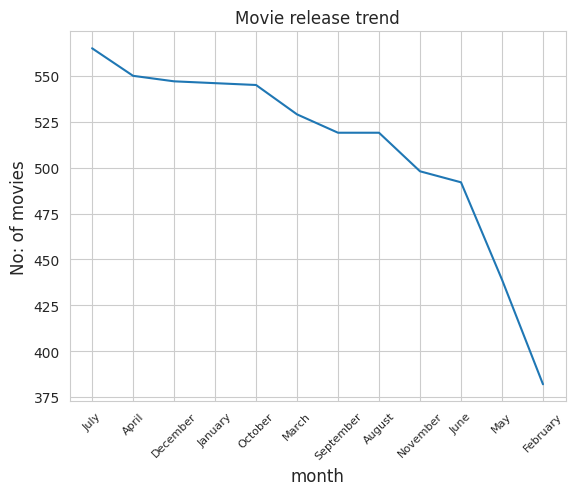

In [ ]:
movie_date_group = movie_dates.month_name_added.value_counts()
movie_date_group_df = pd.DataFrame(movie_date_group)
movie_date_group_df = movie_date_group.reset_index()
movie_date_group_df
movie_date_group_df = movie_date_group_df.rename(columns={'month_name_added':'month', 'count':'no_of_movies'})

sns.lineplot(x='month', y='no_of_movies', data=movie_date_group_df)
plt.title('Movie release trend')
plt.xticks(rotation=45, fontsize = 8)
plt.xlabel('month',fontsize=12)
plt.ylabel('No: of movies',fontsize=12)
plt.show()

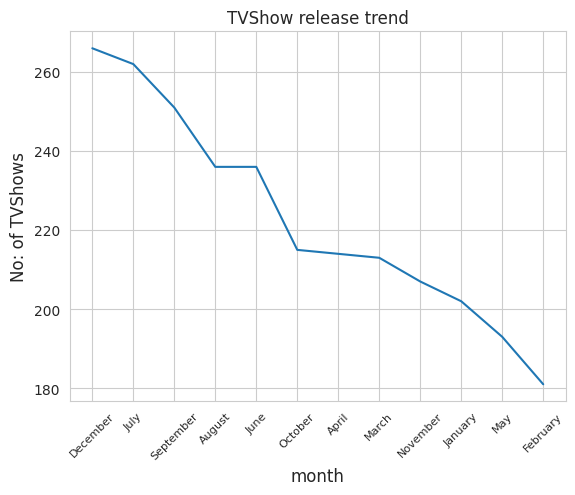

In [ ]:
TVShow_dates = date_df.loc[date_df['type'] == 'TV Show']
TVShow_date_group = TVShow_dates.month_name_added.value_counts()
TVShow_date_group_df = pd.DataFrame(TVShow_date_group).reset_index()
TVShow_date_group_df = TVShow_date_group_df.rename(columns = {'month_name_added': 'month', 'count':'no_of_TVShows'})

sns.lineplot(x='month', y='no_of_TVShows', data=TVShow_date_group_df)
plt.title('TVShow release trend')
plt.xticks(rotation=45, fontsize = 8)
plt.xlabel('month',fontsize=12)
plt.ylabel('No: of TVShows',fontsize=12)
plt.show()

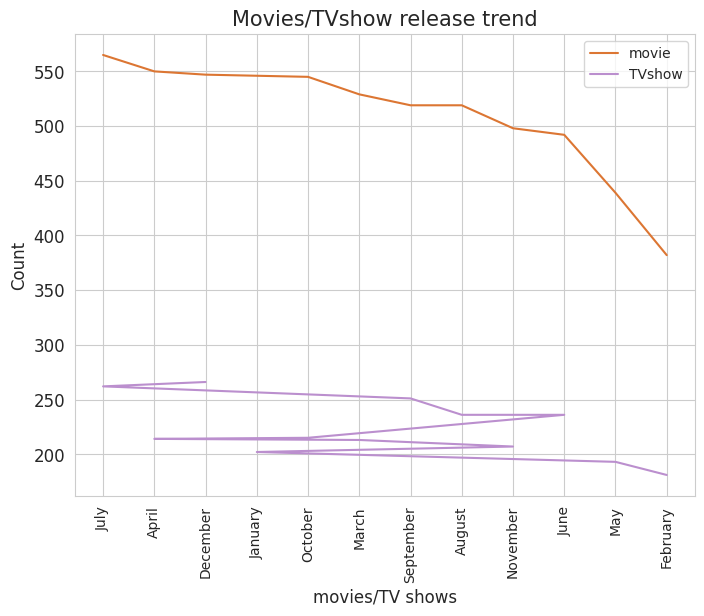

In [ ]:
x1_bar = movie_date_group_df['month']
y1_bar = movie_date_group_df['no_of_movies']
x2_bar = TVShow_date_group_df['month']
y2_bar = TVShow_date_group_df['no_of_TVShows']
plt.figure(figsize=(8,6))
plt.plot(x1_bar,y1_bar,color = '#DC7633', label = 'movie')
plt.plot(x2_bar,y2_bar,color = '#BB8FCE', label = 'TVshow')
plt.title('Movies/TVshow release trend',fontsize=15)
plt.xlabel('movies/TV shows',fontsize=12)
plt.ylabel('Count',fontsize=12)
plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=12)
plt.legend()

**July** month has maximum number of movie releases around 565, **April** having 550 movie releases and **December** with 547 movie releases.
These months could be the best time to launch a movie

**December** month has maximum number of TV show releases around 266, **July** having 262 show releases and **September** with 251 show releases

**Number of movies/TV Shows added over years**

In [ ]:
movie_year_df = date_df.groupby(['year_added', 'type'])['show_id'].count()
movie_year_df = movie_year_df.reset_index()
movie_year_df=movie_year_df.rename({'show_id':'no: of movies/tv shows'})


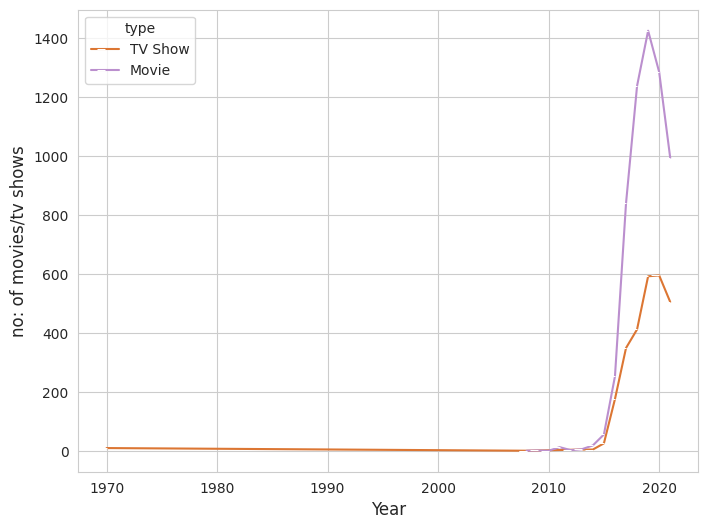

In [ ]:
movie_year_df = date_df.groupby(['year_added', 'type'])['show_id'].count().reset_index()
movie_year_df.rename({'show_id':'no: of movies/tv shows'})
plt.figure(figsize = (8,6))
palette_colors = {'Movie':'#BB8FCE', 'TV Show':'#DC7633'}
sns.lineplot(data = movie_year_df, x = 'year_added', y = 'show_id', hue = 'type', marker = 0, markersize = 6, palette = palette_colors)
plt.xlabel ('Year', fontsize = 12)
plt.ylabel ('no: of movies/tv shows', fontsize = 12)
plt.show()

**4. Analysis of actors/directors of different types of shows/movies.**

a. Identify the top 10 directors who have appeared in most movies or TV shows.

Hint : We want you to group by each actor and find the count of unique titles of
Tv-shows/movies

In [ ]:
cast_df

,show_id,type,title,cast
1,s2,TV Show,Blood & Water,Ama Qamata
1,s2,TV Show,Blood & Water,Khosi Ngema
1,s2,TV Show,Blood & Water,Gail Mabalane
1,s2,TV Show,Blood & Water,Thabang Molaba
1,s2,TV Show,Blood & Water,Dillon Windvogel
...,...,...,...,...
8806,s8807,Movie,Zubaan,Manish Chaudhary
8806,s8807,Movie,Zubaan,Meghna Malik
8806,s8807,Movie,Zubaan,Malkeet Rauni
8806,s8807,Movie,Zubaan,Anita Shabdish


In [ ]:
cast_type_df = cast_df.groupby(['cast','type'])['show_id'].count().sort_values(ascending = False)
cast_type_df

cast              type   
Anupam Kher       Movie      42
Shah Rukh Khan    Movie      35
Naseeruddin Shah  Movie      32
Om Puri           Movie      30
Akshay Kumar      Movie      30
                             ..
Jack Guzman       TV Show     1
Jack Gordon       TV Show     1
Jack Gilpin       Movie       1
Jack Foley        Movie       1
Ṣọpẹ́ Dìrísù      Movie       1
Name: show_id, Length: 40814, dtype: int64

In [ ]:
cast_type_df = cast_type_df.rename({'show_id':'no: of movies/tvshows'})
top_10_actors = cast_type_df.head(10)
top_10_actors

cast              type 
Anupam Kher       Movie    42
Shah Rukh Khan    Movie    35
Naseeruddin Shah  Movie    32
Om Puri           Movie    30
Akshay Kumar      Movie    30
Paresh Rawal      Movie    28
Amitabh Bachchan  Movie    28
Julie Tejwani     Movie    28
Boman Irani       Movie    27
Rupa Bhimani      Movie    27
Name: show_id, dtype: int64

All the top 10 actors have made more number of movies thank TV shows

In [ ]:
TVShow_cast_df = cast_df.loc[cast_df['type'] == 'TV Show']
TVShow_actors = TVShow_cast_df.cast.value_counts()
TVShow_actors

cast
Takahiro Sakurai         25
Yuki Kaji                19
Daisuke Ono              17
Junichi Suwabe           17
Ai Kayano                17
                         ..
Bhumibhat Thavornsiri     1
Thanongsak Suphakan       1
Kanjanaporn Plodpai       1
Boonsong Nakphoo          1
Hina Khawaja Bayat        1
Name: count, Length: 14863, dtype: int64

In [ ]:
TVShow_actors = TVShow_cast_df.cast.value_counts()
TVShow_actors_df = TVShow_actors.reset_index()
Top_10_TVshow_actors = TVShow_actors_df.head(10)

**4. Analysis of actors/directors of different types of shows/movies.**

a. Identify the top 10 directors who have appeared in most movies or TV shows.

Hint : We want you to group by each director and find the count of unique titles
of Tv-shows/movies

______________________________________________________________________________

In [ ]:
director_df

,show_id,type,title,director
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson
2,s3,TV Show,Ganglands,Julien Leclercq
5,s6,TV Show,Midnight Mass,Mike Flanagan
6,s7,Movie,My Little Pony: A New Generation,Robert Cullen
6,s7,Movie,My Little Pony: A New Generation,José Luis Ucha
...,...,...,...,...
8801,s8802,Movie,Zinzana,Majid Al Ansari
8802,s8803,Movie,Zodiac,David Fincher
8804,s8805,Movie,Zombieland,Ruben Fleischer
8805,s8806,Movie,Zoom,Peter Hewitt


In [ ]:
top_director_df = director_df.value_counts()
top_director_df

show_id  type   title                           director         
s3719    Movie  Blood Will Tell                 Miguel Cohan         2
s1       Movie  Dick Johnson Is Dead            Kirsten Johnson      1
s6562    Movie  Danny Says                      Brendan Toller       1
s6575    Movie  De Film van Dylan Haegens       Bas van Teylingen    1
s6574    Movie  Dayveon                         Amman Abbasi         1
                                                                    ..
s3875    Movie  Sur Sapata                      Mangesh Kanthale     1
s3874    Movie  Munafik 2                       Syamsul Yusof        1
s3873    Movie  Knock Down The House            Rachel Lears         1
s3872    Movie  John & Yoko: Above Us Only Sky  Michael Epstein      1
s997     Movie  HOMUNCULUS                      Takashi Shimizu      1
Name: count, Length: 6977, dtype: int64

In [ ]:
movie_director_df = director_df.loc[director_df['type'] == 'Movie']
movie_director_df

,show_id,type,title,director
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson
6,s7,Movie,My Little Pony: A New Generation,Robert Cullen
6,s7,Movie,My Little Pony: A New Generation,José Luis Ucha
7,s8,Movie,Sankofa,Haile Gerima
9,s10,Movie,The Starling,Theodore Melfi
...,...,...,...,...
8801,s8802,Movie,Zinzana,Majid Al Ansari
8802,s8803,Movie,Zodiac,David Fincher
8804,s8805,Movie,Zombieland,Ruben Fleischer
8805,s8806,Movie,Zoom,Peter Hewitt


In [ ]:
movie_director_group = movie_director_df.director.value_counts().head(10)

In [ ]:
movie_director_group_df = pd.DataFrame(movie_director_group).reset_index()

In [ ]:
TVShow_director_df = director_df.loc[director_df['type'] == 'TV Show']
TVShow_director_df

,show_id,type,title,director
2,s3,TV Show,Ganglands,Julien Leclercq
5,s6,TV Show,Midnight Mass,Mike Flanagan
8,s9,TV Show,The Great British Baking Show,Andy Devonshire
11,s12,TV Show,Bangkok Breaking,Kongkiat Komesiri
20,s21,TV Show,Monsters Inside: The 24 Faces of Billy Milligan,Olivier Megaton
...,...,...,...,...
8293,s8294,TV Show,The Fear,Michael Samuels
8302,s8303,TV Show,The Five,Mark Tonderai
8549,s8550,TV Show,The Vietnam War: A Film by Ken Burns and Lynn ...,Ken Burns
8549,s8550,TV Show,The Vietnam War: A Film by Ken Burns and Lynn ...,Lynn Novick


In [ ]:
TVShow_director_df.director.value_counts().head(10)

director
Alastair Fothergill      3
Ken Burns                3
Jung-ah Im               2
Gautham Vasudev Menon    2
Iginio Straffi           2
Hsu Fu-chun              2
Stan Lathan              2
Joe Berlinger            2
Shin Won-ho              2
Lynn Novick              2
Name: count, dtype: int64

# Which genre movies are more popular or produced more

In [ ]:
genre_df

,show_id,type,listed_in
0,s1,Movie,Documentaries
1,s2,TV Show,International TV Shows
1,s2,TV Show,TV Dramas
1,s2,TV Show,TV Mysteries
2,s3,TV Show,Crime TV Shows
...,...,...,...
8805,s8806,Movie,Children & Family Movies
8805,s8806,Movie,Comedies
8806,s8807,Movie,Dramas
8806,s8807,Movie,International Movies


In [ ]:
movie_genre = genre_df.loc[genre_df['type'] == 'Movie']

In [ ]:
popular_genre = movie_genre.listed_in.value_counts()
popular_genre

listed_in
International Movies        2752
Dramas                      2427
Comedies                    1674
Documentaries                869
Action & Adventure           859
Independent Movies           756
Children & Family Movies     641
Romantic Movies              616
Thrillers                    577
Music & Musicals             375
Horror Movies                357
Stand-Up Comedy              343
Sci-Fi & Fantasy             243
Sports Movies                219
Classic Movies               116
LGBTQ Movies                 102
Anime Features                71
Cult Movies                   71
Faith & Spirituality          65
Movies                        57
Name: count, dtype: int64

(array([   0.,  500., 1000., 1500., 2000., 2500., 3000.]),
 [Text(0, 0.0, '0'),
  Text(0, 500.0, '500'),
  Text(0, 1000.0, '1000'),
  Text(0, 1500.0, '1500'),
  Text(0, 2000.0, '2000'),
  Text(0, 2500.0, '2500'),
  Text(0, 3000.0, '3000')])

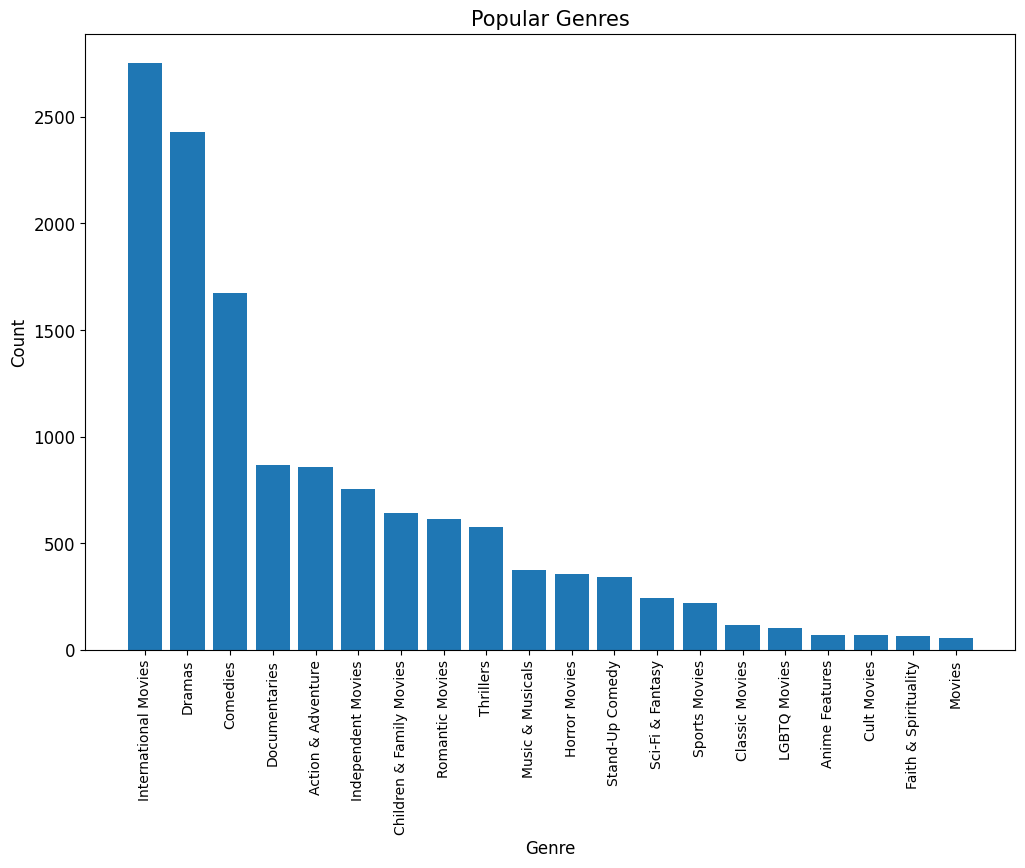

In [ ]:
x_bar=popular_genre.index
y_bar=popular_genre
plt.figure(figsize=(12,8))
plt.bar(x_bar,y_bar)
plt.title('Popular Genres',fontsize=15)
plt.xlabel('Genre',fontsize=12)
plt.ylabel('Count',fontsize=12)
plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=12)

In [ ]:
releases_per_year = netflix_data['release_year'].value_counts()
releases_per_year

release_year
2018    1147
2017    1032
2019    1030
2020     953
2016     902
        ... 
1959       1
1925       1
1961       1
1947       1
1966       1
Name: count, Length: 74, dtype: int64

In [ ]:
netflix_data['release_year'].max()

2021

In [ ]:
netflix_data['release_year'].min()

1925

**Total content distribution**

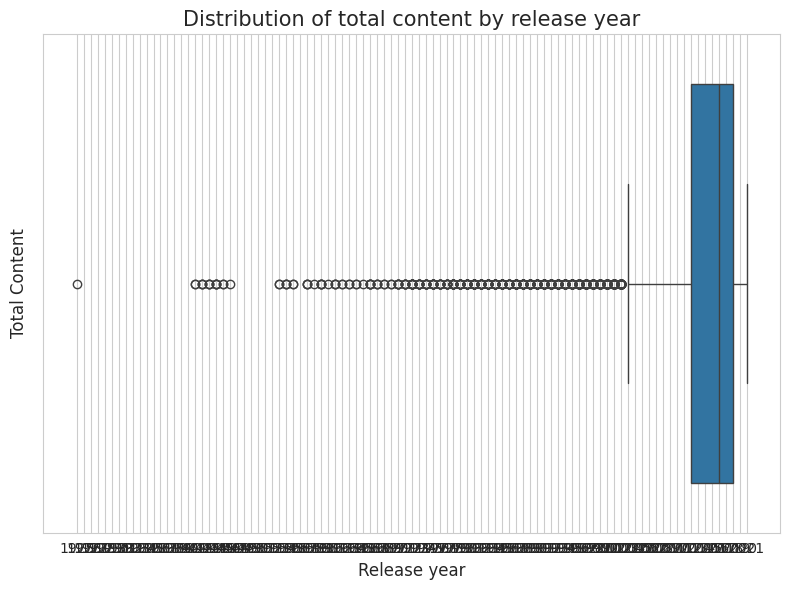

In [ ]:
plt.figure(figsize = (8,6))
sns.boxplot(data = netflix_data, x = 'release_year')
plt.xlabel("Release year", fontsize = 12)
plt.ylabel("Total Content", fontsize =12)
plt.title("Distribution of total content by release year", fontsize = 15)
plt.xticks(np.arange(1925,2022))
plt.tight_layout()
plt.show()

**Country wise rating of content**

In [47]:
top_10_countries = country_df['country'].value_counts().head(10).index
#top_10_countries
top_10_countries_df = country_df[country_df['country'].isin(top_10_countries)]
#top_10_countries_df
countries_merged = top_10_countries_df.merge(netflix_data, on = 'show_id')
rating_count = countries_merged.groupby(['country_x', 'rating'])['show_id'].count().reset_index()
#rating_count
rating_country_pivot = rating_count.pivot(index = 'country_x', columns = 'rating', values = 'show_id').fillna(0)
rating_country_pivot

rating,66 min,74 min,84 min,G,NC-17,NR,PG,PG-13,R,TV-14,TV-G,TV-MA,TV-PG,TV-Y,TV-Y7,TV-Y7-FV,UR
country_x,,,,,,,,,,,,,,,,,
Canada,0.0,0.0,0.0,2.0,1.0,5.0,33.0,32.0,79.0,49.0,17.0,107.0,39.0,45.0,35.0,1.0,0.0
France,0.0,0.0,0.0,2.0,1.0,4.0,21.0,35.0,57.0,48.0,6.0,163.0,12.0,21.0,21.0,0.0,2.0
Germany,0.0,0.0,0.0,1.0,0.0,2.0,8.0,31.0,43.0,27.0,9.0,79.0,17.0,3.0,6.0,0.0,0.0
India,0.0,0.0,0.0,0.0,0.0,7.0,7.0,11.0,5.0,572.0,10.0,266.0,144.0,6.0,17.0,1.0,0.0
Japan,0.0,0.0,0.0,1.0,0.0,0.0,11.0,9.0,9.0,99.0,2.0,102.0,50.0,3.0,32.0,0.0,0.0
Mexico,0.0,0.0,0.0,0.0,0.0,4.0,2.0,4.0,14.0,22.0,3.0,102.0,12.0,0.0,6.0,0.0,0.0
South Korea,0.0,0.0,0.0,1.0,0.0,4.0,2.0,1.0,2.0,86.0,1.0,92.0,19.0,9.0,14.0,0.0,0.0
Spain,0.0,0.0,0.0,3.0,1.0,1.0,4.0,5.0,13.0,18.0,1.0,170.0,10.0,5.0,1.0,0.0,0.0
United Kingdom,0.0,0.0,0.0,4.0,0.0,12.0,35.0,84.0,145.0,103.0,25.0,253.0,98.0,34.0,12.0,0.0,1.0


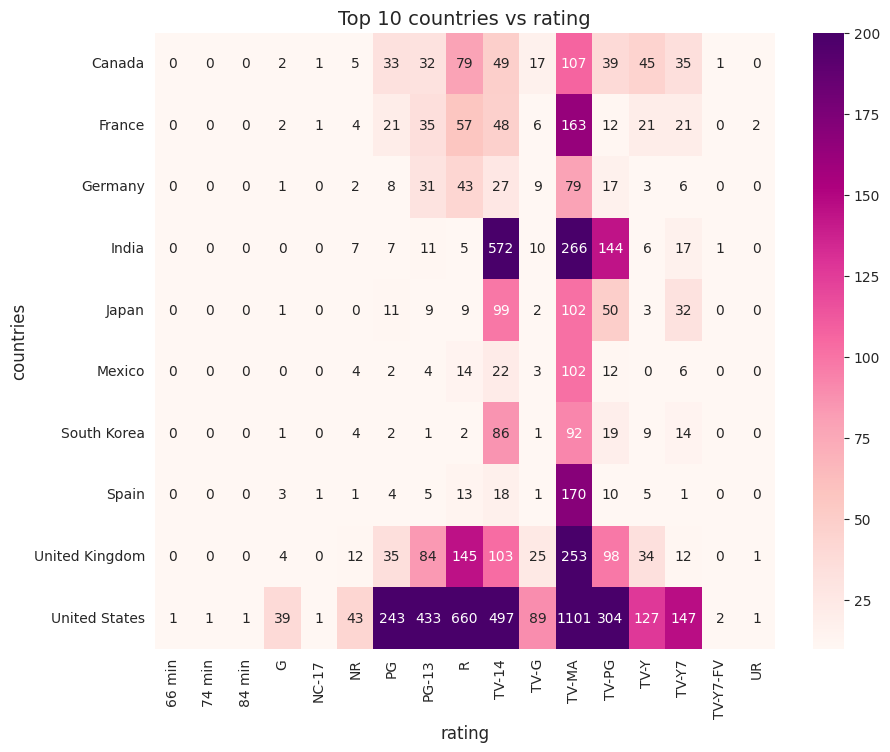

In [53]:
plt.figure(figsize = (10,8))
sns.heatmap(data=rating_country_pivot, cmap = 'RdPu', annot = True, fmt = '0.0f', vmin = 10, vmax = 200 )
plt.ylabel('countries', fontsize = 12)
plt.xlabel('rating', fontsize = 12)
plt.title('Top 10 countries vs rating', fontsize = 14)
plt.show()

Most of the TV-MA(matured audience only) rated content is from US, UK and India.Other hightly rated content include TV-PG(parental guidance suggested).
Content for general audience can be added so that content would be suitable for wide range of audience.